# Importing the Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime

# Reading the pickle file

In [3]:
df = pd.read_pickle("./data/data_pkls/nasdaq100.pkl")
df.head()

SPLK                                 FTNT                 ... CSGP  \
           Open High Low Close Adj Close Volume Open High Low Close  ...  Low   
Date                                                                 ...        
1962-01-02  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...  NaN   
1962-01-03  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...  NaN   
1962-01-04  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...  NaN   
1962-01-05  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...  NaN   
1962-01-08  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...  NaN   

                                    MU                                  
           Close Adj Close Volume Open High Low Close Adj Close Volume  
Date                                                                    
1962-01-02   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-03   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-04   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-05   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-08   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  

[5 rows x 606 columns]

In [4]:
# Here I am choosing a single ticker to work the problem with and once i have working model, I will include others

amd_data = df['AMD']
amd_data.shape

(15618, 6)

In [5]:
#Checking if the AMD ticker data has any missing values

amd_data.isnull().sum()

Open         4565
High         4565
Low          4565
Close        4565
Adj Close    4565
Volume       4565
dtype: int64

In [6]:
amd_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Since the dataframe has 4565 missing values since 1960's, I am going to reduce the data to start from late 1990's

clean_amd = amd_data.iloc[9000:, :]
clean_amd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-09-30,16.21875,16.65625,16.00000,16.28125,16.28125,4521800.0
1997-10-01,14.75000,14.87500,13.37500,13.50000,13.50000,24972400.0
1997-10-02,13.87500,14.50000,13.71875,14.40625,14.40625,10023800.0
1997-10-03,14.50000,15.56250,14.31250,14.90625,14.90625,9889200.0
1997-10-06,15.09375,15.09375,14.03125,14.03125,14.03125,5090800.0


# Ploting AMD stock trends since 1997

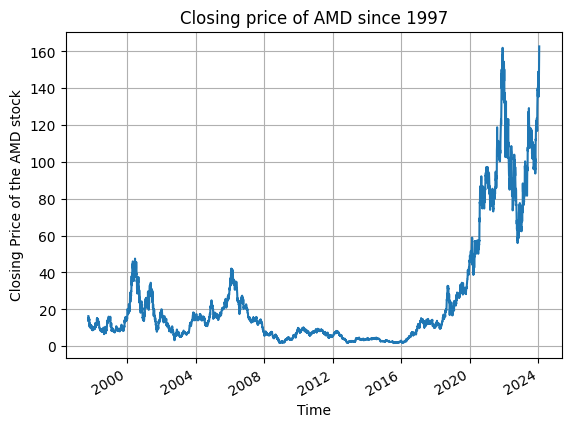

In [8]:
#Plotting the closing price of AMD stock since 1997

clean_amd['Close'].plot()
plt.ylabel('Closing Price of the AMD stock')
plt.xlabel('Time')
plt.title('Closing price of AMD since 1997')
plt.grid()

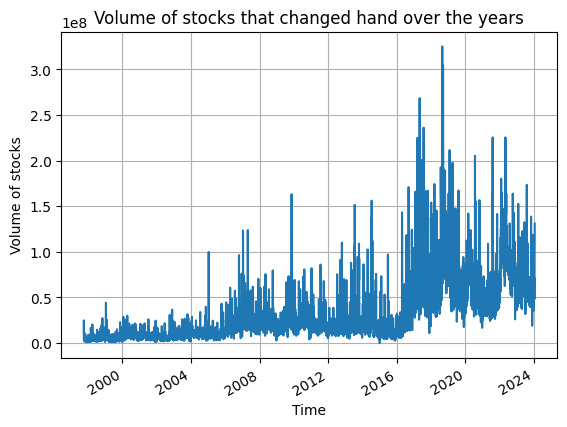

In [9]:
#Plotting the volume of stocks being traded each day since 1997

clean_amd['Volume'].plot()
plt.ylabel('Volume of stocks')
plt.xlabel('Time')
plt.title('Volume of stocks that changed hand over the years')
plt.grid()

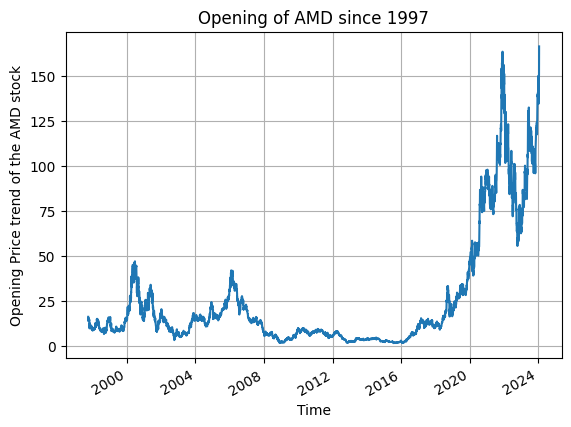

In [10]:
#Plotting the open price of AMD stock since 1997

clean_amd['Open'].plot()
plt.ylabel('Opening Price trend of the AMD stock')
plt.xlabel('Time')
plt.title('Opening of AMD since 1997')
plt.grid()

In [11]:
clean_amd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-09-30,16.21875,16.65625,16.00000,16.28125,16.28125,4521800.0
1997-10-01,14.75000,14.87500,13.37500,13.50000,13.50000,24972400.0
1997-10-02,13.87500,14.50000,13.71875,14.40625,14.40625,10023800.0
1997-10-03,14.50000,15.56250,14.31250,14.90625,14.90625,9889200.0
1997-10-06,15.09375,15.09375,14.03125,14.03125,14.03125,5090800.0


# Splitting the dataframe into training and testing

In [12]:
# Here I am splitting the data with 20% of it goes towards testing

test_split = round(len(clean_amd)*0.20)
data_train = clean_amd[:-test_split]
data_test = clean_amd[-test_split:]
print('Shape of training data: ',data_train.shape)
print('Shape of testing data: ', data_test.shape)

Shape of training data:  (5294, 6)
Shape of testing data:  (1324, 6)


# Scaling the data values 

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(data_test)

data_train_scaled

array([[0.32170009, 0.31972335, 0.32786512, 0.31955645, 0.31955645,
        0.01391073],
       [0.28933451, 0.28167058, 0.2680565 , 0.25893636, 0.25893636,
        0.07682435],
       [0.27005289, 0.27365947, 0.27588858, 0.27868897, 0.27868897,
        0.03083692],
       ...,
       [0.54054649, 0.55586411, 0.55570745, 0.55841325, 0.55841325,
        0.32443955],
       [0.56765093, 0.54924161, 0.53087263, 0.50959024, 0.50959024,
        0.45432728],
       [0.50947553, 0.52360608, 0.52267029, 0.51612902, 0.51612902,
        0.45226888]])

In [14]:
#Splitting the data into dependent and independent variables where n_backtrack is the number of past data our LSTM 
#will work with. I chose 60

def train_test(dataset, n_backtrack):
    X = []
    y = []

    for i in range(n_backtrack, len(dataset)):
        X.append(dataset[i-n_backtrack:i, 0:dataset.shape[1]])
        y.append(dataset[i, 3])     # Here "3" represents our target column which is "close"
    
    return np.array(X), np.array(y)     # converting the X and y into arrays to feed the LSTM 

X_train, y_train = train_test(data_train_scaled, 60)
X_test, y_test = train_test(data_test_scaled, 60)

In [15]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_train shape:  (5234, 60, 6)
y_train shape:  (5234,)


In [16]:
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_test shape:  (1264, 60, 6)
y_test shape:  (1264,)


#  Building the LSTM model and training it over the AMD stock data 

In [17]:
#Importing the deep learning libraries and building the model

from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60,6)))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss=keras.losses.binary_crossentropy, optimizer= 'Adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15, batch_size=21)

Epoch 1/15


c:\Users\msi1\Music\AASD4010_project\deep.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 1.0155e-04 - loss: 0.4309
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 1.2688e-04 - loss: 0.4216
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 2.9283e-04 - loss: 0.4210
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 1.4490e-04 - loss: 0.4196
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 6.8230e-04 - loss: 0.4216
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 2.2051e-04 - loss: 0.4215
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 8.1562e-04 - loss: 0.4234
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.0011 - loss: 0.4227
Epoch 9/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.0010 - loss: 0.4209
Epoch 10/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 1.4212e-04 - loss: 0.4215
Epoch 11/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 3.4009e-04 - loss: 0.4204
Epoch 12/15

In [18]:
#Predicting the values using the test dataset 

prediction = model.predict(X_test)
print('Prediction: ', prediction)
print('\nPrediction shape- ', prediction.shape)

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
Prediction:  [[0.4121691 ]
 [0.40675408]
 [0.40334624]
 ...
 [1.8275907 ]
 [1.879436  ]
 [1.8825349 ]]

Prediction shape-  (1264, 1)


In [19]:
# Since the data I scaled had 6 columns and the prediction I got has only one column, I can not perform inverse
# transform and get the old values

scaler.inverse_transform(prediction)

ValueError: non-broadcastable output operand with shape (1264,1) doesn't match the broadcast shape (1264,6)

In [21]:
#I am duplicating the values of prediction into 5 other columns, so that i have the same shape as before

prediciton_dup_array = np.repeat(prediction, 6, axis=-1)

In [22]:
print(prediciton_dup_array)

[[0.4121691  0.4121691  0.4121691  0.4121691  0.4121691  0.4121691 ]
 [0.40675408 0.40675408 0.40675408 0.40675408 0.40675408 0.40675408]
 [0.40334624 0.40334624 0.40334624 0.40334624 0.40334624 0.40334624]
 ...
 [1.8275907  1.8275907  1.8275907  1.8275907  1.8275907  1.8275907 ]
 [1.879436   1.879436   1.879436   1.879436   1.879436   1.879436  ]
 [1.8825349  1.8825349  1.8825349  1.8825349  1.8825349  1.8825349 ]]


In [23]:
prediciton_dup_array.shape

(1264, 6)

In [24]:
pred = scaler.inverse_transform(np.reshape(prediciton_dup_array, (len(prediction), 6)))[:,3]

In [25]:
#Now we need to compare this pred values with testY. But our testY is also scaled. 
#So, let’s use inverse transform with the same above codes.

original_dup_array = np.repeat(y_test, 6, axis=-1)
original= scaler.inverse_transform(np.reshape(original_dup_array, (len(y_test), 6)))[:,3]

In [26]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [20.530317 20.281878 20.125525 ... 85.469864 87.848526 87.9907  ]

Original Values--  [ 19.73999977  20.27000046  20.22999954 ... 158.74000549 160.16999817
 162.66999817]


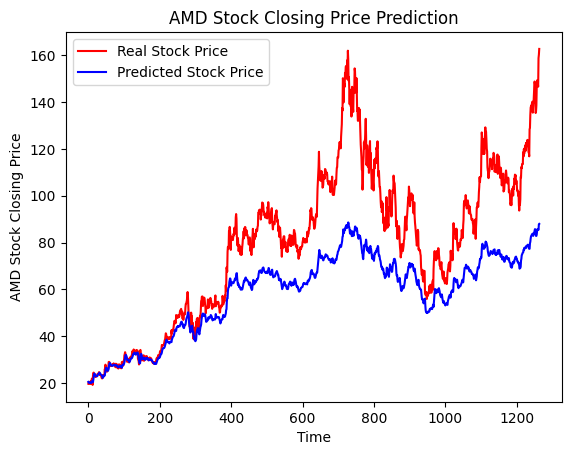

In [27]:
plt.plot(original, color = 'red', label = 'Real Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Stock Price')
plt.title('AMD Stock Closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMD Stock Closing Price')
plt.legend()
plt.show()

# Analysis
As we can see, our model is able to learn from the data and predict the trends of actual closing price of the stock. Although the model is not able to predict the exact change in price of the stock, it definitely is predicting the behavious of price surge and drop, which is a valuable information when you're investing in certain stock.

### Future Improvements
Next challenge is to use the stock data of multiple organization and make a generalized model, where I can select the backtrack duration(how far back in time we are feeding the data to LSTM model to train) and forwardtrack duration(how far in the future, we are predicting the values)